# 목표 예측값 높이기
- 시간순 (fast -> slow)
  - 분류기 바꾸기 -> 신경망 업뎃





임포트

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


데이터 로드 데이터 체크


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13


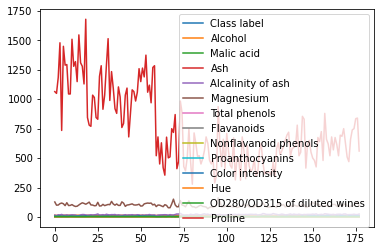

In [11]:
import pandas as pd
data = load_wine()
print(data.keys())
print(data['target_names']) #class = 3
print(data['feature_names'])
print(len(data['feature_names']))


#df = pd.DataFrame(data['data'], columns=data['feature_names'])
#df.plot()
#df.head()
#df.plot.bar(figsize=(100,10), rot=90)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
    'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
    'Hue','OD280/OD315 of diluted wines','Proline']
df.plot()


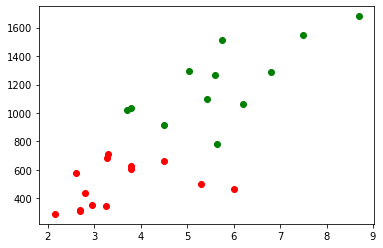

In [ ]:
wine = load_wine()
#print(wine.feature_names)
x = wine.data[:130, :]
y = wine.target[:130]

x_train, x_test, y_train, y_test = \
  train_test_split(x, y, stratify = y, test_size= 0.2, random_state = 42)

  # 실제 정답
for i in range(len(y_test)):
  if y_test[i] ==1:
    plt.scatter(x_test[i,9], x_test[i, 12],c='r')
  elif y_test[i] ==0:
    plt.scatter(x_test[i, 9], x_test[i, 12], c='g')


Bayesian

In [17]:
#Bayesian sklearn =0.915384615384616
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)


#print("Number 0f mislabeled points out of a total %d points %d" % (x_test.shape[0], (y_test != y_pred).sum()))
print(confusion_matrix(y_test,y_pred))

print("result: ", gnb.score(x_test,y_test))


#정확도 비교해보기
bay_score = accuracy_score(y_test, y_pred)
print('베이지안의 정확도 : ',bay_score)

# 분석결과 확인
bay_report = classification_report(y_test, y_pred)
print(bay_report)

# 오차행렬인 컴퓨전 메트릭스 확인
bay_matrix = confusion_matrix(y_test, y_pred)
print(bay_matrix)

[[12  0]
 [ 1 13]]
result:  0.9615384615384616
베이지안의 정확도 :  0.9615384615384616
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

[[12  0]
 [ 1 13]]


random forest

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)

#예측
y_pred = random_forest.predict(x_test)

#정확도 비교해보기
random_accuracy = accuracy_score(y_test, y_pred)
print('random forest의 정확도 : ',random_accuracy)

# 분석결과 확인
random_report = classification_report(y_test, y_pred)
print(random_report)

# 오차행렬인 컴퓨전 메트릭스 확인
random_matrix = confusion_matrix(y_test, y_pred)
print(random_matrix)

random forest의 정확도 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

[[12  0]
 [ 0 14]]


신경망

In [ ]:
import torch
from torch.autograd import Variable
import  torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

np.random.seed(100)

################################copy paste
wine = load_wine()
#print(wine.feature_names)
x = wine.data[:130, :]
y = wine.target[:130]

x_train, x_test, y_train, y_test = \
  train_test_split(x, y, stratify = y, test_size= 0.2, random_state = 42)

#print(len(train_x))
#print(len(test_x))
#print(train_x)
#print(train_y)

#훈련 데이터 텐서 변환
x_train = torch.from_numpy(x).float()
y_train = torch.from_numpy(y).long()
print(x_train)
print(y_train)

# 테스트 데이터 텐서 변환
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

# 텐서로 변환한 데이터 건수 확인
print(x_train.shape)
print(y_train.shape)

train = TensorDataset(x_train, y_train)
train_loader = DataLoader(train, batch_size= 16, shuffle= True)

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # input
        self.fc1 = nn.Linear(13,96)
        # hidden
        self.fc2 = nn.Linear(96,96)
        self.fc3 = nn.Linear(96,96)
        self.fc4 = nn.Linear(96,96)
        self.fc5 = nn.Linear(96,96)
        #output
        self.fc6 = nn.Linear(96,2)

    def forward(self,x):
        #입력층~ 중간층(4층) relu 함수 사용
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        # 출력층
        x = self.fc6(x)
        #로그소프트맥스 함수
        return F.log_softmax(x, dim = 1)

# 인스턴스 생성
model= Net()
# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체
#optimizer = optim.SGD(model.parameters(),lr =0.01)#0.8846153846153846

!pip install madgrad

import madgrad
#바꾸기
optimizer = madgrad.MADGRAD(model.parameters(),lr = 0.0001,weight_decay=1e-5) #0.9615384615384616 weight_decay=1e-5

print("{} \t {}".format("eporch","total_loss"))
print("--------------\t-----------------")

for epoch in range(300):

    total_loss =0

    for x_train, y_train in train_loader:

        #계산 그래프 구성
        x_train, y_train = Variable(x_train), Variable(y_train)
        #경사 초기화
        optimizer.zero_grad()
        #순전파 계산
        output = model.forward(x_train)
        #오차 계산
        loss = criterion(output, y_train)
        #역전파 계산
        loss.backward()
        #가중치 업데이트
        optimizer.step()
        #누적 오차 계산
        total_loss += loss.data

    #50회 반복마다 누적 오차 출력
    if (epoch+1) % 50 == 0:
        print(epoch+1,total_loss)



#계산 그래프 구성
x_test, y_test = Variable(x_test), Variable(y_test)

# 출력이 0 또는 1이 되게함
result = torch.max(model(x_test).data, dim = 1)[1]

#모형의 정확도 측정
accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())
print(accuracy)


tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00,  ..., 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3200e+01, 1.7800e+00, 2.1400e+00,  ..., 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3160e+01, 2.3600e+00, 2.6700e+00,  ..., 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        ...,
        [1.1790e+01, 2.1300e+00, 2.7800e+00,  ..., 9.7000e-01, 2.4400e+00,
         4.6600e+02],
        [1.2370e+01, 1.6300e+00, 2.3000e+00,  ..., 8.9000e-01, 2.7800e+00,
         3.4200e+02],
        [1.2040e+01, 4.3000e+00, 2.3800e+00,  ..., 7.9000e-01, 2.5700e+00,
         5.8000e+02]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    

#완료

- 베이지안
  -  0.9615384615384616

- 랜덤포레스트
  - 1.0

- 신경망
  - 0.9615384615384616


